/home/headong/miniconda3/envs/pytorch/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'DBSCAN')

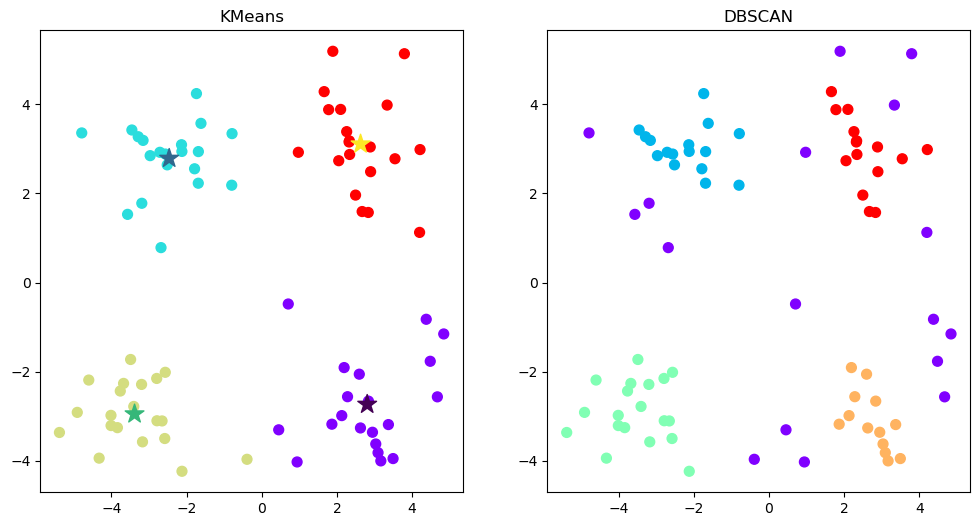

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd


# 读取数据
def load_data_set(file_name):
    data_set = []
    with open(file_name, 'r') as f:
        for line in f.readlines():
            x, y = line.strip().split()
            data_set.append([float(x), float(y)])
    return np.array(data_set)

# k-means算法
def k_means(data_set, k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_set)
    return kmeans.labels_, kmeans.cluster_centers_

# DBScan算法
def dbscan(data_set, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(data_set)
    return dbscan.labels_


#读取数据，并转换成numpy的格式
data = np.array(pd.read_csv(r'testSet.txt', sep='\t', header=None, usecols=[0, 1]))

#使用k-means进行聚类
k = 4
k_means_labels, k_means_centers = k_means(data, 4)

# 使用DBScan算法进行聚类分析
eps = 0.9 #半径
min_samples = 4 #最小点数
dbscan_labels = dbscan(data, eps, min_samples)

# 绘制聚类结果
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(data[:, 0], data[:, 1], c=k_means_labels, s=50, cmap='rainbow')
ax[0].scatter(k_means_centers[:, 0], k_means_centers[:, 1], c=range(k), s=200, marker='*')
ax[0].set_title("KMeans")

#这里紫色的点表示噪声点
#剩下的点，每个颜色代表一个簇
ax[1].scatter(data[:, 0], data[:, 1], c=dbscan_labels, s=50, cmap='rainbow')
ax[1].set_title("DBSCAN")


[0 3 1 2 0 3 1 2 0 3 1 2 0 3 1 2 0 3 1 2 0 3 1 2 0 3 1 2 0 3 1 2 0 3 1 2 0
 3 1 2 0 3 1 2 0 3 1 2 0 3 1 2 0 3 1 2 0 3 1 2 0 3 1 2 0 3 1 2 0 3 1 2 0 3
 1 2 0 3 1 2]


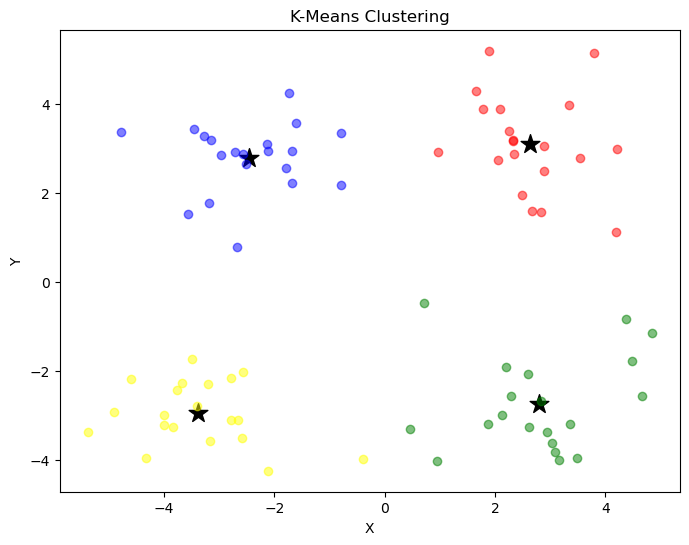

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KMeans:
    def __init__(self, n_clusters=2, max_iterations=1000, tolerance=0.0001):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        
    def fit(self, X):
        self.centroids = X[np.random.choice(len(X), self.n_clusters, replace=False)]
        for i in range(self.max_iterations):
            clusters = [[] for _ in range(self.n_clusters)]
            for x in X:
                distances = [euclidean_distance(x, c) for c in self.centroids]
                cluster = np.argmin(distances)
                clusters[cluster].append(x)
            prev_centroids = self.centroids.copy()
            for j, cluster in enumerate(clusters):
                if len(cluster) > 0:
                    self.centroids[j] = np.mean(cluster, axis=0)
            if np.allclose(self.centroids, prev_centroids, rtol=0, atol=self.tolerance):
                break
        self.labels_ = np.zeros(len(X)).astype(int)
        for i, cluster in enumerate(clusters):
            for x in cluster:
                index = np.where(X == x)[0][0]
                self.labels_[index] = i
        return self
        
if __name__ == '__main__':
    # 生成示例数据
    #data1 = np.random.normal(loc=[0, 0], scale=[0.5, 0.5], size=(10, 2))
    #data2 = np.random.normal(loc=[3, 3], scale=[0.5, 0.5], size=(10, 2))
    #X = np.vstack((data1, data2))
    X = np.array(pd.read_csv(r'testSet.txt', sep='\t', header=None, usecols=[0, 1]))

    # 对数据进行K-Means聚类
    kmeans = KMeans(n_clusters=4).fit(X)

    # 输出聚类结果
    labels = kmeans.labels_
    print(labels)

    # 可视化聚类结果
    fig, ax = plt.subplots(figsize=(8, 6))
    colors = ['red', 'green','yellow', 'blue']
    for i, cluster in enumerate(kmeans.centroids):
        ax.scatter(cluster[0], cluster[1], color='black', marker='*', s=200)
        ax.scatter(X[labels == i, 0], X[labels == i, 1], color=colors[i], alpha=0.5)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('K-Means Clustering')
    plt.show()
